## Confusion Marix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Given values for TP, TN, FP, FN
TN = 0  # True Negatives
FP = 167    # False Positives
FN = 0    # False Negatives
TP = 433  # True Positives

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) != 0 else 0

# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Accuracy: 0.72
Precision: 0.72
Recall: 1.00
F1-Score: 0.84


In [26]:
#Create the confusion matrix

TP = 97  # True Negatives
FN = 70    # False Positives
FP = 0    # False Negatives
TN = 433  # True Positives

classifier_name = 'RandomForest'
# classifier_name = 'HIVECOTEV2'
snr_value = 0
me_level = 10


cm= np.array([[TP, FN], [FP, TN]])

class_names = ['No activity', 'Activity present']

# Plot confusion matrix
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'{classifier_name} at White SNR = {snr_value} and ME SNR = {me_level} ')
plt.grid(True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
filename = f'{classifier_name}_{snr_value}_{me_level}_{timestamp}'
save_figure(name=filename, figdir='./plots', height=2.5, width=3)
    

## Receptive field

In [2]:
def analytical_solution(k, s, L):
    """
    Calculate the receptive field size for a multi-layer neural network.

    Parameters:
    k : list of int
        Layer kernel sizes [k_1, k_2, ..., k_L].
    s : list of int
        Layer strides [s_1, s_2, ..., s_L].
    L : int
        Number of layers.

    Returns:
    int
        The calculated receptive field size.
    """
    r = 1  # Initial receptive field size

    for l in range(1, L + 1):  # Iterate over each layer
        S = 1  # Reset cumulative stride
        for i in range(1, l):  # Compute the product of strides up to (l-1)
            S *= s[i - 1]  # Use zero-based indexing
        r += (k[l - 1] - 1) * S  # Update receptive field size for the layer

    return r


# Example usage:
k = [20,20,20,20,20,20]  # Kernel sizes for layers
s = [1,1,1,1,1,1]  # Strides for layers
L = len(k)  # Number of layers

receptive_field = analytical_solution(k, s, L)
print(f"Receptive field size: {receptive_field}")

Receptive field size: 115


In [3]:
# Example usage:
k = [3,3,40]  # Kernel sizes for layers
s = [2,1,1]  # Strides for layers
L = len(k)  # Number of layers

receptive_field = analytical_solution(k, s, L)
print(f"Receptive field size: {receptive_field}")


Receptive field size: 85


In [4]:
# Example usage:
k = [3,3,20,20,20,20,20,20]  # Kernel sizes for layers
s = [2,1,1,1,1,1,1,1]  # Strides for layers
L = len(k)  # Number of layers

receptive_field = analytical_solution(k, s, L)
print(f"Receptive field size: {receptive_field}")

Receptive field size: 235


In [5]:
# Example usage:
k = [3,3,20,20,20,20,20,20]  # Kernel sizes for layers
s = [2,1,1,1,1,1,1,1]  # Strides for layers
L = len(k)  # Number of layers

receptive_field = analytical_solution(k, s, L)
print(f"Receptive field size: {receptive_field}")

Receptive field size: 235


In [6]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.patches as mpatches
from src.utils import save_figure

def visualize_multiple_receptive_fields(configs, subplot_position, new_labels, title):
    """
    Visualize the receptive field growth for multiple configurations on the same plot.

    Parameters:
    configs : list of dict
        Each dict contains:
        - 'k': list of kernel sizes for each layer [k_1, k_2, ..., k_L].
        - 's': list of strides for each layer [s_1, s_2, ..., s_L].
        - 'label': str, label for the configuration.
    subplot_position : tuple
        Position of the subplot (rows, cols, index).
    title : str
        Title for the subplot.
    """
    plt.subplot(*subplot_position)
    
    for idx, config in enumerate(configs):
        k = config['k']
        s = config['s']
        label = config['label']
        L = len(k)  # Number of layers

        # Initialize receptive field
        r = 1  # Initial receptive field size
        receptive_fields = []  # Store RF for each layer
        layers = list(range(1, L + 1))  # Layer indices

        # Calculate receptive field size for each layer
        for l in range(1, L + 1):
            S = 1  # Cumulative stride
            for i in range(1, l):  # Compute cumulative stride
                S *= s[i - 1]
            r += (k[l - 1] - 1) * S
            receptive_fields.append(r)

        # Plot the progression
        #plt.scatter(layers, receptive_fields, label=label, s=20, color=config['color'])
        plt.plot(layers, receptive_fields, linestyle="-", alpha=0.5, linewidth=0.7, color=config['color'])

        if idx == 0:
             conv1 = mpatches.Patch(color=cmap(0), label='Kernel size = 3')
             conv10 = mpatches.Patch(color=cmap(1), label='Kernel size = 10')
             conv20 = mpatches.Patch(color=cmap(2), label='Kernel size = 20')
             conv40 = mpatches.Patch(color=cmap(4), label='Kernel size = 40')
                                

             plt.legend(handles=[conv1,conv10,conv20,conv40], title="Colored by Conv1", loc='upper left')
    plt.axhline(y=134, color='red', linestyle='dashed')
    plt.text(0.9, 140, "AP length", fontsize=6, color='red')



    # Customize the plot
    plt.title(title)
    #plt.xlabel("Layers")
    plt.ylabel("Receptive Field Size")
    plt.ylim(0, 730)
    plt.xticks(ticks=layers, labels=new_labels, rotation=75)
    plt.grid(True, linestyle="--", alpha=0.7)


t = [3, 10, 20, 40]
c = list(itertools.combinations_with_replacement(t, 9))
unq = list(set(c))

cmap = get_cmap('tab10')
color_map = {
    3: cmap(0),  # First color in Tab10
    10: cmap(1),  # Second color in Tab10
    20: cmap(2),  # Third color in Tab10
    40: cmap(4)   # Fourth color in Tab10
}

configs_with_cnn = [
    {
        'k': np.append([3, 3], comb),
        's': [2, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1],
        'label': f'Conv {comb[2]}x1: With initial CNN',
        'color': color_map[comb[0]]
    }
    for comb in unq
]

configs = [
    {
        'k': comb,
        's': [1, 1, 1, 1, 1, 1, 1,1,1,1],
        'label': f'Conv {comb[-1]}x1: With initial CNN',
        'color': color_map[comb[0]]  # Assign color based on the first value
    }
    for comb in unq
]

# Create subplots
#plt.figure(figsize=(, 10))
visualize_multiple_receptive_fields(configs, new_labels=["Conv1", "Conv2", "Conv3", "Conv4", "Conv5", "Conv6","Conv7", "Conv8", "Conv9"],title="Receptive Field Growth for Unique Paths", subplot_position=(1, 2, 1))

visualize_multiple_receptive_fields(configs_with_cnn, new_labels=["Conv k=3, stride=2", "Conv k=3, stride=1", "Conv1", "Conv2", "Conv3", "Conv4", "Conv5", "Conv6","Conv7", "Conv8", "Conv9"], subplot_position=(1, 2, 2), title="Receptive Field Growth for Unique Paths with Initial CNN")

save_figure(name="receptive_field_with_cnn_d9", figdir='./plots', height=4, width=6)


/tmp/ipykernel_3037922/3562732173.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


In [16]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.patches as mpatches
from src.utils import save_figure

def visualize_multiple_receptive_fields(configs, subplot_position, new_labels, title, bold_paths):
    """
    Visualize the receptive field growth for multiple configurations on the same plot.

    Parameters:
    configs : list of dict
        Each dict contains:
        - 'k': list of kernel sizes for each layer [k_1, k_2, ..., k_L].
        - 's': list of strides for each layer [s_1, s_2, ..., s_L].
        - 'label': str, label for the configuration.
    subplot_position : tuple
        Position of the subplot (rows, cols, index).
    title : str
        Title for the subplot.
    bold_paths : set
        Set of kernel sequences that should be bold.
    """
    plt.subplot(*subplot_position)
    
    common_color = "#1f77b4"  # Use the same color for all paths
    bold_linewidth = 2.0
    normal_linewidth = 0.7
    
    legend_handles = []  # Store legend entries

    # bold_shades = ["#B4009E","#EC5656", "#EF008C"]  # Different shades of black (dark gray)
    bold_shades = ["#651b7e","#dd4f66", "#fca572"]  # Different shades of black (dark gray)
    bold_shades_map = {path: shade for path, shade in zip(bold_paths, itertools.cycle(bold_shades))}

    for config in configs:
        k = tuple(config['k'])  # Convert to tuple for comparison
        s = config['s']
        L = len(k)  # Number of layers

        # Initialize receptive field
        r = 1  # Initial receptive field size
        receptive_fields = []  # Store RF for each layer
        layers = list(range(1, L + 1))  # Layer indices

        # Calculate receptive field size for each layer
        for l in range(1, L + 1):
            S = 1  # Cumulative stride
            for i in range(1, l):  # Compute cumulative stride
                S *= s[i - 1]
            r += (k[l - 1] - 1) * S
            receptive_fields.append(r)

        # Check if the path should be bold
        is_bold = k in bold_paths
        linewidth = bold_linewidth if is_bold else normal_linewidth
        color_value = bold_shades_map[k] if is_bold else common_color
        alpha_value = 1 if is_bold else 0.5

        # Plot the progression
        plt.plot(layers, receptive_fields, linestyle="-", alpha=alpha_value, linewidth=linewidth, color=color_value)

        # Add to legend if bold
        if is_bold:
            legend_handles.append(mpatches.Patch(color=color_value, label=f"Kernel size path: {k}"))


    plt.axhline(y=134, color='black', linestyle='dashed')
    plt.text(0.9, 140, "AP length", fontsize=6, color='black')

    # Customize the plot
    plt.title(title)
    plt.ylabel("Receptive Field Size")
    plt.ylim(0, 730)
    plt.xticks(ticks=layers, labels=new_labels, rotation=75)
    plt.grid(True, linestyle="--", alpha=0.7)

    # Add legend for bold paths
    if legend_handles:
        plt.legend(handles=legend_handles, fontsize=5)


t = [3, 10, 20, 40]
c = list(itertools.combinations_with_replacement(t, 9))
unq = list(set(c))

bold_paths = {
    (3, 10, 20, 20, 20, 40),  # Example of a bold path
    (20, 20, 20, 20, 20, 20),  # Another bold path
    (40, 40, 40, 40, 40, 40)   # Another one
}

bold_paths_cnn = {
    (3, 3, 3, 10, 20, 20, 20, 40),  # Example of a bold path
    (3, 3, 20, 20, 20, 20, 20, 20),  # Another bold path
    (3, 3, 40, 40, 40, 40, 40, 40)   # Another one
}

# bold_paths = {
# }

# bold_paths_cnn = {
# }


configs_with_cnn = [
    {
        'k': np.append([3, 3], comb),
        's': [1, 2, 1, 1, 1, 1, 1, 1],
        'label': f'Conv {comb[2]}x1: With initial CNN'
    }
    for comb in unq
]

configs = [
    {
        'k': comb,
        's': [1, 1, 1, 1, 1, 1],
        'label': f'Conv {comb[-1]}x1: With initial CNN'
    }
    for comb in unq
]


visualize_multiple_receptive_fields(configs, 
                                    new_labels=["Conv1", "Conv2", "Conv3", "Conv4", "Conv5", "Conv6", "Conv7", "Conv8", "Conv9"],
                                    title="Receptive Field Growth for Unique Paths", 
                                    subplot_position=(1, 2, 1),
                                    bold_paths=bold_paths)

visualize_multiple_receptive_fields(configs_with_cnn, 
                                    new_labels=["Conv k=3, stride=2", "Conv k=3, stride=1", "Conv1", "Conv2", "Conv3", "Conv4", "Conv5", "Conv6", "Conv7", "Conv8", "Conv9"],
                                    title="Receptive Field Growth for Unique Paths with Initial CNN", 
                                    subplot_position=(1, 2, 2),
                                    bold_paths=bold_paths_cnn)

# visualize_multiple_receptive_fields(configs, 
#                                     new_labels=["Conv1", "Conv2", "Conv3", "Conv4", "Conv5", "Conv6"],
#                                     title="Receptive Field Growth for Unique Paths", 
#                                     subplot_position=(1, 2, 1),
#                                     bold_paths=bold_paths)

# visualize_multiple_receptive_fields(configs_with_cnn, 
#                                     new_labels=["Conv k=3, stride=2", "Conv k=3, stride=1", "Conv1", "Conv2", "Conv3", "Conv4", "Conv5", "Conv6"],
#                                     title="Receptive Field Growth for Unique Paths with Initial CNN", 
#                                     subplot_position=(1, 2, 2),
#                                     bold_paths=bold_paths_cnn)



save_figure(name="receptive_field_with_cnn_d9", figdir='./plots', height=4, width=6)


## Analysis of classification results

In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt
from src.utils import save_figure

In [98]:
# Define datasets
dataset1 = 'simulated_data/DS_20_10_10'
dataset2 = 'simulated_data/DS_20_80_10'

# Load the datasets
X1 = np.load(os.path.join(dataset1, "X.npy"))
X2 = np.load(os.path.join(dataset2, "X.npy"))

# Plot the first sample from both datasets for comparison
plt.figure(figsize=(12, 6))
plt.plot(X1[5], label='DS_20_10', alpha=0.7)
plt.plot(X2[5], label='DS_20_80', alpha=0.7)

plt.title("Comparison of sample without activity from two datasets")
plt.xlabel("Time Index")
plt.ylabel("Voltage (mV)")
plt.xlim(0, 1000)
plt.ylim(-1000, 1000)
plt.legend()
plt.grid(True)
save_figure(name='Classification_no_act', figdir='./plots', width=3, height=2) 


In [99]:
# Plot the first sample from both datasets for comparison
plt.figure(figsize=(12, 6))
plt.plot(X1[2000], label='DS_20_10', alpha=0.7)
plt.plot(X2[2000], label='DS_20_80', alpha=0.7)

plt.title("Comparison of sample with activity from two datasets")
plt.xlabel("Time Index")
plt.ylabel("Voltage (mV)")
plt.xlim(0, 1000)
plt.ylim(-1000, 1000)
plt.legend()
plt.grid(True)
save_figure(name='Classification_act', figdir='./plots', width=3, height=2) 

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, root_mean_squared_error, accuracy_score, mean_absolute_percentage_error, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

dataset1 = 'simulated_data/DS_20_10_10'

classifier = RandomForestClassifier()
X = np.load(os.path.join(dataset1, "X.npy"))
y_reg = np.load(os.path.join(dataset1, "y_reg.npy"))
y_class = [0 if value < 5 else 1 for value in y_reg]

X_train, X_temp, y_class_train, y_class_temp, y_reg_train, y_reg_temp = train_test_split(
X, y_class, y_reg, test_size=0.3, random_state=42)
X_val, X_test, y_class_val, y_class_test, y_reg_val, y_reg_test = train_test_split(
X_temp, y_class_temp, y_reg_temp, test_size=0.5, random_state=42)

classifier.fit(X_train, np.array(y_class_train))

y_class_train_pred = classifier.predict(X_train)
y_class_val_pred = classifier.predict(X_val)
y_class_test_pred = classifier.predict(X_test)

accuracy_train = accuracy_score(y_class_train, y_class_train_pred)
accuracy_test = accuracy_score(y_class_test, y_class_test_pred)

print("Train and test Classifier Accuracy:", accuracy_train, accuracy_test)




Train and test Classifier Accuracy: 1.0 1.0


In [133]:
# Get feature importance
feature_importances = classifier.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.plot(feature_importances, label="Feature Importance", color='magenta')
plt.title("DS_20_10: Feature Importance Across Time Points for RF")
plt.xlabel("Time Point Index")
plt.ylabel("Importance")
plt.ylim(0, 0.025)
plt.legend()
plt.grid(True)
save_figure(name='Classificaton_FI_DS_20_10', figdir='./plots', width=3, height=2) 


In [124]:
# Define datasets
dataset1 = 'simulated_data/DS_20_80_10'

# Load the datasets
X1 = np.load(os.path.join(dataset1, "X.npy"))

# Plot the first sample from both datasets for comparison
plt.figure(figsize=(12, 6))
plt.plot(X1[5], label='DS_20_80', alpha=0.7)
plt.plot(feature_importances*10000, label = 'feature importance', alpha = 0.9, color= 'magenta' )

plt.title("Comparison of sample without activity from two datasets")
plt.xlabel("Time Index")
plt.ylabel("Voltage (mV)")
# plt.xlim(0, 1000)
plt.ylim(-500, 500)
plt.legend()
plt.grid(True)
save_figure(name='FI_overlay', figdir='./plots', width=6, height=4) 


In [67]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(classifier)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)


In [75]:
shap.initjs()

(600, 2700, 2)
SHAP Values for Class 0: (600, 2700)
SHAP Values for Class 1: (600, 2700)


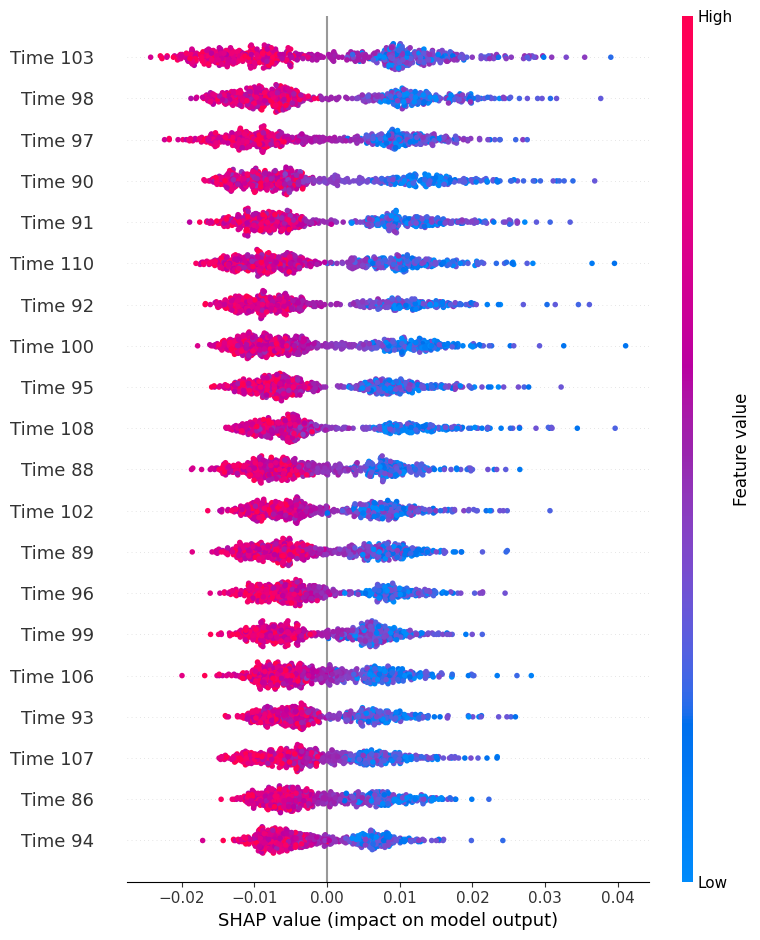

In [77]:
print(shap_values.shape)

# Print the shapes of the SHAP values for each class
print(f"SHAP Values for Class 0: {shap_values[:, :, 0].shape}")  # Should be (600, 2700)
print(f"SHAP Values for Class 1: {shap_values[:, :, 1].shape}")  # Should be (600, 2700)

# Visualize SHAP values for class 1 (for example)
shap.summary_plot(shap_values[:,:,1], X_test, feature_names=[f"Time {i}" for i in range(X_test.shape[1])])


In [62]:
# If you want to see a force plot for a single instance:
shap.force_plot(explainer.expected_value[1], shap_values[0, :, 1], X_test[0])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

SHAP Values for Class 0: (2700, 4)
SHAP Values for Class 1: (2700, 4)
Feature Matrix (X_test): (600, 2700)


## Classifcation results multiple runs

In [1]:
import pandas as pd

In [9]:
files = ['results/classification_r1.csv', 'results/classification_r3.csv', 'results/classification_r3.csv']

# Use pandas to read and concatenate the files
combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

# Save the combined data to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

In [2]:

HC2_F1s = [0.91,0.89,1,0.89,1,0.91,1,0.95,1,1,1,1]

RF_F1s= [0.84,0.84,0.93,0.84,1,0.84,1,0.95,1,1,1,1]


In [3]:
from scipy import stats

stat, p_value = stats.wilcoxon(RF_F1s, HC2_F1s)

# Print the result
print(f"Test statistic: {stat}, P-value: {p_value}")

# Decide if the difference is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two models.")
else:
    print("There is no significant difference between the two models.")

Test statistic: 0.0, P-value: 0.041226833337163676
There is a significant difference between the two models.


/zhome/31/c/147318/irishcream/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/zhome/31/c/147318/irishcream/lib/python3.10/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
